Taxi Database
http://www.andresmh.com/nyctaxitrips/

In [3]:
import pandas as pd
import numpy as np
pd.set_option('max_rows',10)
%matplotlib inline

path = 'data/fare2.h5'

In [28]:
# inspect
df = pd.read_csv('data/final.csv',
                  nrows=10,
                  names="medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_date,pickup_time,dropoff_date,dropoff_time,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude".split(','),
                  usecols="medallion,hack_license,pickup_date,pickup_time,dropoff_date,dropoff_time,passenger_count,trip_distance".split(','),                    )
df

,medallion,hack_license,pickup_date,pickup_time,dropoff_date,dropoff_time,passenger_count,trip_distance
0,81124DBD6AB03F24B895D5CF04AAACA2,EFEDEB0551AA8916DE8F1997F0DE3647,2013-01-01,00:02:42,2013-01-01,00:02:50,1,0.0
1,C8C1AAEB85749A3A2D1279A1C1DA89AC,51CC5CA07EDCBC3BE57775EDB9F4771B,2013-01-01,00:58:45,2013-01-01,01:10:34,2,3.5
2,DAF57CF25F00457CC6077CD628EC71AC,F426171D9725BF58B391BA8BEC3919F0,2013-01-01,02:36:56,2013-01-01,02:47:00,3,2.2
3,901E4965DF59FA006B74057ACE3F979F,797E4DBEC1C53DBC3196540342C64D4B,2013-01-01,15:16:04,2013-01-01,15:23:33,0,0.0
4,14581655B9201FAB51523708396522E5,04F81021ECEAA5E70763E550E2FD778E,2013-01-02,08:52:21,2013-01-02,08:56:52,1,1.6
5,9EE993809F648D39D24F5BA8F862D7F1,21A4E9E21656A71FA038C8DB534BACEE,2013-01-02,10:45:55,2013-01-02,11:18:57,1,17.9
6,77B3DCADC2BE183652C31B1C0C08255A,B040BE2E935E0EBF4C45CCA1C7A2D87A,2013-01-02,10:55:02,2013-01-02,11:14:16,1,4.0
7,3B26D0D0A99C09AB80BBB6AC8C506774,D09CFB64B08B99A2390D52BFD4AE519A,2013-01-02,10:55:26,2013-01-02,11:24:15,1,8.2
8,5C7D1231937EF7F6E2481C3CFBF10B25,47BB8746DEC29D70A6AB5EF0F1731D5C,2013-01-02,11:00:27,2013-01-02,11:24:28,1,5.4
9,2413E4CDDDBD025497869B47D21C82E4,C9C7B3B2015E6DC7E1BE9B573FD77727,2013-01-02,11:00:39,2013-01-02,11:24:16,1,7.5


In [29]:
df.dtypes

medallion           object
hack_license        object
pickup_date         object
pickup_time         object
dropoff_date        object
dropoff_time        object
passenger_count      int64
trip_distance      float64
dtype: object

In [30]:
pd.to_datetime(df['dropoff_date'] + ' ' + df['dropoff_time'],infer_datetime_format=True)

0   2013-01-01 00:02:50
1   2013-01-01 01:10:34
2   2013-01-01 02:47:00
3   2013-01-01 15:23:33
4   2013-01-02 08:56:52
5   2013-01-02 11:18:57
6   2013-01-02 11:14:16
7   2013-01-02 11:24:15
8   2013-01-02 11:24:28
9   2013-01-02 11:24:16
dtype: datetime64[ns]

In [4]:
def read_and_convert_data():

    def parse_dates(df, name):

        date = df.pop("%s_date" % name)
        time = df.pop("%s_time" % name)
        df[name] = pd.to_datetime(date + ' ' + time,infer_datetime_format=True)
        return df

    def parse_cats(df, name):
        df[name] = df[name].astype('category')
        return df
    
    df = pd.read_csv('data/final.csv',
                     nrows=10000000,
                     names="medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_date,pickup_time,dropoff_date,dropoff_time,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude".split(','),
                     usecols="medallion,hack_license,pickup_date,pickup_time,dropoff_date,dropoff_time,passenger_count,trip_distance".split(','),                    )

    df = parse_dates(df, 'pickup')
    df = parse_dates(df, 'dropoff')
    df = parse_cats(df, 'medallion')
    df = parse_cats(df, 'hack_license')

    df.to_hdf(path,'df',mode='w',format='table',data_columns=['medallion','hack_license'])

In [10]:
%timeit -n 1 -r 1 read_and_convert_data()

1 loops, best of 1: 1min 5s per loop


In [5]:
df = pd.read_hdf(path,'df')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000000 entries, 0 to 9999999
Data columns (total 6 columns):
medallion          category
hack_license       category
passenger_count    int64
trip_distance      float64
pickup             datetime64[ns]
dropoff            datetime64[ns]
dtypes: category(2), datetime64[ns](2), float64(1), int64(1)
memory usage: 419.8 MB


In [6]:
df.head()

,medallion,hack_license,passenger_count,trip_distance,pickup,dropoff
0,81124DBD6AB03F24B895D5CF04AAACA2,EFEDEB0551AA8916DE8F1997F0DE3647,1,0.0,2013-01-01 00:02:42,2013-01-01 00:02:50
1,C8C1AAEB85749A3A2D1279A1C1DA89AC,51CC5CA07EDCBC3BE57775EDB9F4771B,2,3.5,2013-01-01 00:58:45,2013-01-01 01:10:34
2,DAF57CF25F00457CC6077CD628EC71AC,F426171D9725BF58B391BA8BEC3919F0,3,2.2,2013-01-01 02:36:56,2013-01-01 02:47:00
3,901E4965DF59FA006B74057ACE3F979F,797E4DBEC1C53DBC3196540342C64D4B,0,0.0,2013-01-01 15:16:04,2013-01-01 15:23:33
4,14581655B9201FAB51523708396522E5,04F81021ECEAA5E70763E550E2FD778E,1,1.6,2013-01-02 08:52:21,2013-01-02 08:56:52


In [7]:
# uniques for the medallions
len(df.medallion.cat.categories)

6845

In [8]:
# uniques for the hack license
len(df.hack_license.cat.categories)

19060

In [9]:
# lengh of the ride
df['length'] = df['dropoff']-df['pickup']

In [10]:
l = df['length']

In [11]:
l.nlargest(10)

499319    21 days 00:29:24
591541    21 days 00:11:12
1049181   21 days 00:07:13
1603829   21 days 00:04:45
9778835   15 days 07:40:23
7398894   14 days 00:12:09
9080109   14 days 00:03:59
1342321   14 days 00:01:40
9778850    7 days 21:57:37
9881439    7 days 01:16:49
Name: length, dtype: timedelta64[ns]

In [12]:
df.loc[l.nlargest(10).index]

,medallion,hack_license,passenger_count,trip_distance,pickup,dropoff,length
499319,862921D5C13425C2DBDB7D065231FB1E,0C1A981E411908D59CB5D8A45097C0B6,1,9.8,2013-01-03 15:30:01,2013-01-24 15:59:25,21 days 00:29:24
591541,128307B5B4418255867779D6E0814FCC,8865ED00BB9261FE4A450A33905C7CB2,1,1.9,2013-01-03 23:02:11,2013-01-24 23:13:23,21 days 00:11:12
1049181,128307B5B4418255867779D6E0814FCC,8865ED00BB9261FE4A450A33905C7CB2,1,1.1,2013-01-05 23:03:51,2013-01-26 23:11:04,21 days 00:07:13
1603829,1BEEA74F93CD153F6CAF0601551EFBFC,4D5B9D2700B465B742161DF320C51BCA,1,0.8,2013-01-08 17:56:04,2013-01-29 18:00:49,21 days 00:04:45
9778835,3349F919AA8AE5DC9C50A3773EA45BD8,B17863F57B0C08C097D7B16982DC3A0E,1,4.9,2013-02-12 09:24:55,2013-02-27 17:05:18,15 days 07:40:23
7398894,C7BF056F5E2EF6D4CCF68EA4A23502A7,31C1767F1B1A285992705288B9024DD9,1,2.7,2013-02-01 22:43:01,2013-02-15 22:55:10,14 days 00:12:09
9080109,B1225A61714B803509D43E67612A495E,E02638526ACD19533C6E15BE51E6CF84,2,0.6,2013-02-08 21:09:15,2013-02-22 21:13:14,14 days 00:03:59
1342321,128307B5B4418255867779D6E0814FCC,A1D1E7C658D78B1906F8FCE575467B74,2,0.4,2013-01-07 12:37:21,2013-01-21 12:39:01,14 days 00:01:40
9778850,3349F919AA8AE5DC9C50A3773EA45BD8,B17863F57B0C08C097D7B16982DC3A0E,1,2.1,2013-02-12 09:25:00,2013-02-20 07:22:37,7 days 21:57:37
9881439,128307B5B4418255867779D6E0814FCC,8865ED00BB9261FE4A450A33905C7CB2,1,9.7,2013-02-12 18:07:04,2013-02-19 19:23:53,7 days 01:16:49


In [13]:
df['passenger_count'].value_counts()

1    8083783
2    1390031
3     343997
4     175397
5       4525
0       2080
6        186
8          1
dtype: int64

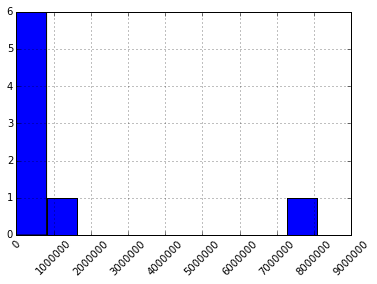

In [14]:
df['passenger_count'].value_counts().hist(xrot=45)

In [15]:
df['trip_distance'].describe()

count    10000000.000000
mean            2.486209
std             2.630351
min             0.000000
25%             1.000000
50%             1.700000
75%             2.900000
max           100.000000
Name: trip_distance, dtype: float64

In [16]:
length_in_hours = df['length'] / np.timedelta64(1,'h')
length_in_hours

0          0.002222
1          0.196944
2          0.167778
3          0.124722
4          0.075278
             ...   
9999995    0.461667
9999996    0.022778
9999997    0.121111
9999998    0.136111
9999999    0.154444
Name: length, dtype: float64

In [25]:
length_in_hours.describe()

count    10000000.000000
mean            0.184284
std             0.428603
min           -20.000000
25%             0.096111
50%             0.154167
75%             0.238611
max           504.490000
Name: length, dtype: float64

In [20]:
r = df.assign(speed=df['trip_distance']/length_in_hours)
r

,medallion,hack_license,passenger_count,trip_distance,pickup,dropoff,length,speed
0,81124DBD6AB03F24B895D5CF04AAACA2,EFEDEB0551AA8916DE8F1997F0DE3647,1,0.0,2013-01-01 00:02:42,2013-01-01 00:02:50,00:00:08,0.000000
1,C8C1AAEB85749A3A2D1279A1C1DA89AC,51CC5CA07EDCBC3BE57775EDB9F4771B,2,3.5,2013-01-01 00:58:45,2013-01-01 01:10:34,00:11:49,17.771509
2,DAF57CF25F00457CC6077CD628EC71AC,F426171D9725BF58B391BA8BEC3919F0,3,2.2,2013-01-01 02:36:56,2013-01-01 02:47:00,00:10:04,13.112583
3,901E4965DF59FA006B74057ACE3F979F,797E4DBEC1C53DBC3196540342C64D4B,0,0.0,2013-01-01 15:16:04,2013-01-01 15:23:33,00:07:29,0.000000
4,14581655B9201FAB51523708396522E5,04F81021ECEAA5E70763E550E2FD778E,1,1.6,2013-01-02 08:52:21,2013-01-02 08:56:52,00:04:31,21.254613
...,...,...,...,...,...,...,...,...
9999995,994C3ED6A4B67E28FAEA0F14FF6020FD,6B5908B61F5E719A919A03FFADC3DFFB,1,7.7,2013-02-13 07:18:54,2013-02-13 07:46:36,00:27:42,16.678700
9999996,5540EDF731F24EAF0A762A2AC3309482,4854C5F00725B2E18A953714DB349380,1,0.3,2013-02-13 07:18:55,2013-02-13 07:20:17,00:01:22,13.170732
9999997,EA00A64CBDB68C77D053F010FDEC70AA,7FA8BCA45AE26F3903DE0FB97D3DC2C5,1,1.2,2013-02-13 07:18:55,2013-02-13 07:26:11,00:07:16,9.908257
9999998,6FD35EAC5708C2586746987E2E16B9AF,90FE8C8D0F5EEA6204AFBA09BB3EDAEC,1,2.1,2013-02-13 07:18:55,2013-02-13 07:27:05,00:08:10,15.428571


count    9.996269e+06
mean              inf
std               NaN
min     -2.452500e+03
25%      8.846881e+00
50%      1.167656e+01
75%      1.552448e+01
max               inf
Name: speed, dtype: float64

In [22]:
pd.cut(r.speed,bins=10)

ValueError: Bin edges must be unique: array([ nan,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf])